In [1]:
import cirq
import numpy as np
import scipy as sp
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
import pandas as pd

# QC algorithm HW#1

## 1)

I use the Cirq library to implement the desired circuit. The resulting state is a Bell state.

0: ───H───@───M───
          │   │
1: ───────X───M───


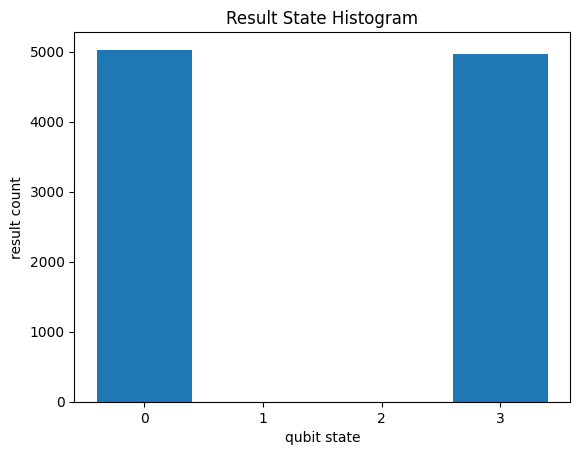

In [2]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.CNOT.on(*qubits))
my_circuit.append(cirq.measure(*qubits))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

I use numpy to implement the same circuit.

In [3]:
### Declare some operators
H = np.sqrt(2)*np.array([[1.,1.],[1.,-1.]])
I = np.array([[1,0],[0,1]])
CNOT = np.array([[1.,0.,0.,0.],
                 [0.,1.,0.,0.],
                 [0.,0.,0.,1.],
                 [0.,0.,1.,0.]])

In [4]:
### Initialize the qubits and calculate the end quantum state
qubits = np.c_[[1.,0.,0.,0.]]
qubits = np.kron(H,I)@qubits
CNOT@qubits

array([[1.41421356],
       [0.        ],
       [0.        ],
       [1.41421356]])

In [5]:
### Roll for initiative
rolls = np.random.rand(10000)
measurement = np.zeros(10000)
for i in range(10000):
    if rolls[i] < 0.5:
        measurement[i] = 0.
    if rolls[i] > 0.5:
        measurement[i] = 3.

(array([5077.,    0.,    0., 4923.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

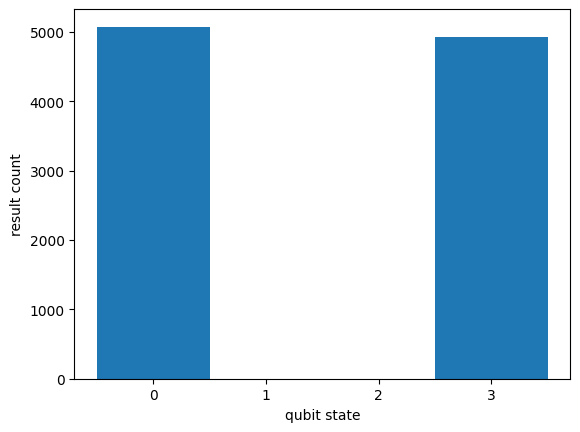

In [6]:
### Plot the findings
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1, xlabel='qubit state', ylabel='result count')
ax0.hist(measurement, bins=4, range=(0,4), align='left')
ax0.set_xticks(range(0,4))

The results look remarkably similar.

## 2)

I use numpy to simulate the desired circuit.

In [43]:
### Initialize qubits and calculate the output state
qubits = np.c_[[1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0,]]
qubits = np.kron(H,np.kron(I,np.kron(I,I)))@qubits
qubits = np.kron(CNOT,np.kron(I,I))@qubits
qubits = np.kron(I,np.kron(CNOT,I))@qubits
qubits = np.kron(I,np.kron(I,CNOT))@qubits
qubits

array([[1.41421356],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.41421356]])

In [44]:
### Roll for initiative
rolls = np.random.rand(10000)
measurement = np.zeros(10000)
for i in range(10000):
    if rolls[i] < 0.5:
        measurement[i] +=0
    if rolls[i] > 0.5:
        measurement[i] +=15

(array([4954.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 5046.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]),
 <BarContainer object of 16 artists>)

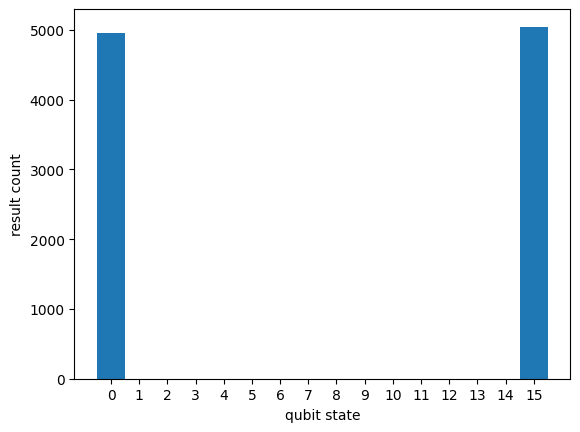

In [45]:
### Plot results
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1, xlabel='qubit state', ylabel='result count')
ax0.hist(measurement, bins=16, range=(0,16), align='left')
ax0.set_xticks(range(0,16))

I use Cirq to simulate the desired circuit.

0: ───H───@───@───@───M───
          │   │   │   │
1: ───────X───┼───┼───M───
              │   │   │
2: ───────────X───┼───M───
                  │   │
3: ───────────────X───M───


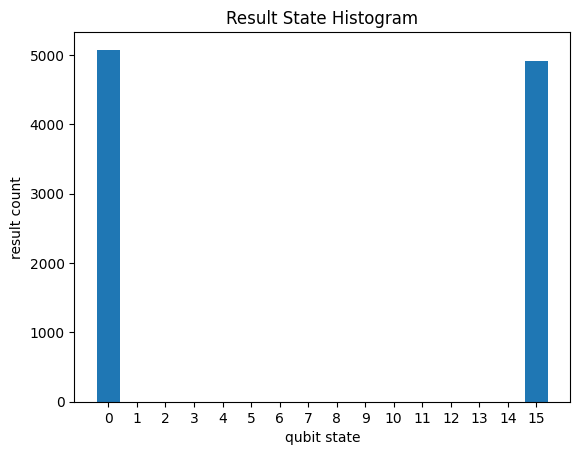

In [46]:
### Initialize qubits, build out circuit, run simulation, and plot results
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(4)
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.CNOT.on(qubits[0],qubits[1]))
my_circuit.append(cirq.CNOT.on(qubits[0],qubits[2]))
my_circuit.append(cirq.CNOT.on(qubits[0],qubits[3]))
my_circuit.append(cirq.measure(*qubits))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

The results, once again, look very similar.

0: ───H───@───@───@───M───
          │   │   │   │
1: ───────X───┼───┼───M───
              │   │   │
2: ───────────X───┼───M───
                  │   │
3: ───────────────X───M───


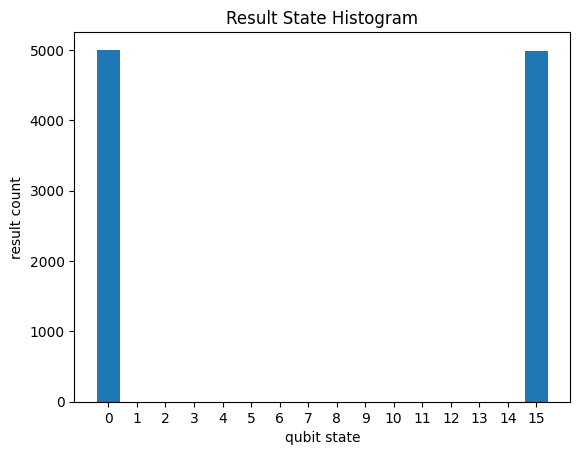

In [54]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(4)
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.CNOT.on(qubits[0],qubits[1]))
my_circuit.append(cirq.CNOT.on(qubits[0],qubits[2]))
my_circuit.append(cirq.CNOT.on(qubits[0],qubits[3]))
my_circuit.append(cirq.measure(*qubits))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()